In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 30 20:15:38 2021
@author: Usuario
"""

import pandas as pd



def find_header(df):
    #Get row and column of #Fecha on the data frame
    result=df.isin(["Fecha"])   
    column_date=result.any()
    column_date=column_date[column_date==True].index[0]
    row_date=result[column_date][result[column_date]==True].index[0]
    
    #On row date get the columns where are the hours [0:23]
    hours=[i for i in range(0,24)]
    #Convert hours from integers to string, in case text above header
    hours_str = list(map(str, hours))
    #List of Combined hours in format integers and string
    hours_comb=hours+hours_str
    #Find by combined hours format
    result=df.iloc[row_date,:].isin(hours_comb) 
    #Get column names for the searched hours 
    columns_hours=list(result[result==True].index)
    
    
    #List of columns wich contains the interested header of the dataframe
    columns=list([column_date])+columns_hours
    #From dataframe only take such columns
    df=df[columns]
    #Set new columns header
    new_columns=["Fecha"]+hours_str
    df.columns=new_columns

    #Get label of parameter downloaded and assing to a entire new column
    #df['file'] = df.iloc[0][0]
    
    #Drop row where the header was found and rows before it
    drop_rows=[i for i in range(0,row_date+1)]
    df = df.drop(drop_rows).reset_index(drop=True)
    
    #Change format of elements in df that could be in string to numeric in hours column
    df[hours_str] = df[hours_str].apply(pd.to_numeric)
    
    
    #Delate nan values on Fecha column
    df.dropna(subset = ["Fecha"], inplace=True)    
    
    #Change format of Fecha column to datetime format
    df["Fecha"] = pd.to_datetime(df["Fecha"])
    
    return df


def read_dataFile(path):
    df = pd.read_excel(path)

    df=find_header(df)

    return df

#http://portalbissrs.xm.com.co/trpr/Histricos/Precios/Precio_Bolsa_Nacional_(%24kwh)_1995.xlsx?

temp = pd.DataFrame({'Fecha' : []})

for year in range(1995, 2020):
    filePath = f'http://portalbissrs.xm.com.co/trpr/Histricos/Precios/Precio_Bolsa_Nacional_(%24kwh)_{year}.xlsx?'
    new_data = read_dataFile(filePath)
    temp = pd.concat([temp, new_data])
    

def melt_df(df):
    #Hours
    hours=[i for i in range(0,24)]
    #Convert hours from integers to string, column names
    hours_str = list(map(str, hours))
    #Melt original dataframe
    df_melt=pd.melt(df,id_vars=["Fecha"],value_vars=hours_str,var_name='Hour', value_name='Precio_Bolsa')
    #Convert string to float
    df_melt["Hour"]=pd.to_numeric(df_melt["Hour"])
    
    #Add hours to the date which only had considered the day
    df_melt["Fecha"]=df_melt["Fecha"]+pd.to_timedelta(df_melt["Hour"],unit='H')
    #Order de data
    df_melt.sort_values(by=['Fecha'], inplace=True, ascending=False) #Most recent first
    #Reset index
    df_melt=df_melt.reset_index(drop=True)
    
    return df_melt

temp_melt=melt_df(temp)

In [ ]:
filePath="Precio_Bolsa_Nacional_($kwh)_2020.xlsx"
df = pd.read_excel(filePath)

In [ ]:
df1 = find_header(df)

In [ ]:
temp = pd.DataFrame({'Fecha' : []})

In [ ]:
time_series_1 = melt_df(df1)
time_series_1

,Fecha,Hour,Precio_Bolsa
0,2020-12-31 23:00:00,23,138.28
1,2020-12-31 22:00:00,22,153.28
2,2020-12-31 21:00:00,21,153.28
3,2020-12-31 20:00:00,20,178.28
4,2020-12-31 19:00:00,19,178.28
...,...,...,...
8779,2020-01-01 04:00:00,4,127.71
8780,2020-01-01 03:00:00,3,127.71
8781,2020-01-01 02:00:00,2,127.71
8782,2020-01-01 01:00:00,1,136.71


In [ ]:
time_series_1=time_series_1[['Fecha', 'Precio_Bolsa']]
time_series_1.set_index('Fecha')

,Precio_Bolsa
Fecha,
2020-12-31 23:00:00,138.28
2020-12-31 22:00:00,153.28
2020-12-31 21:00:00,153.28
2020-12-31 20:00:00,178.28
2020-12-31 19:00:00,178.28
...,...
2020-01-01 04:00:00,127.71
2020-01-01 03:00:00,127.71
2020-01-01 02:00:00,127.71


In [ ]:
from matplotlib import pyplot

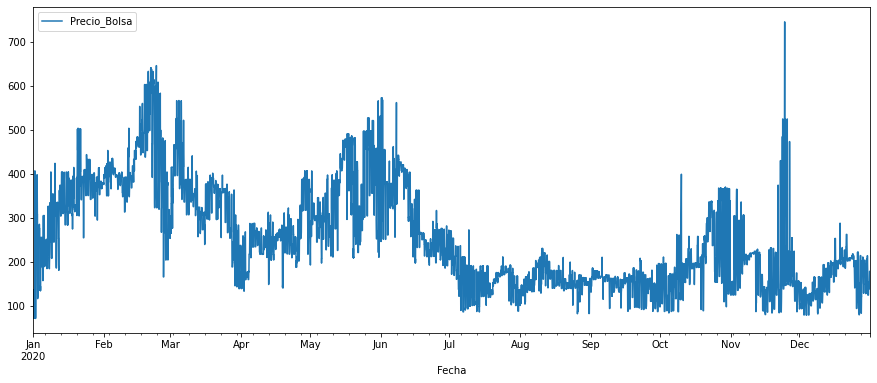

In [ ]:
time_series_1.set_index('Fecha').plot(figsize=(15, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ef18c3ed0>]],
      dtype=object)

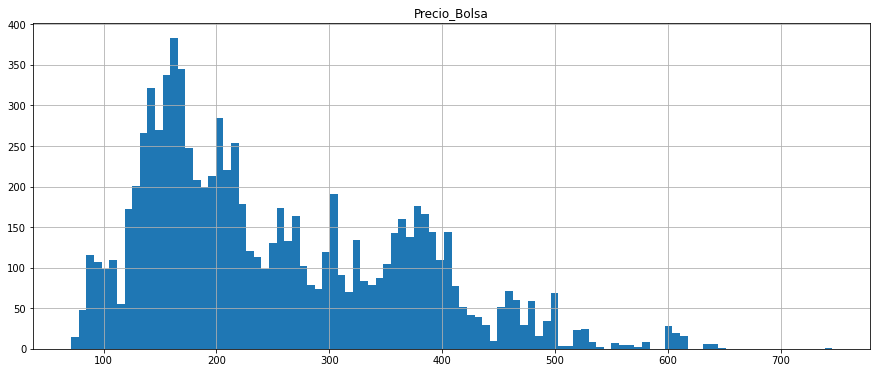

In [ ]:
time_series_1.set_index('Fecha').hist(bins = 100, figsize=(15, 6))

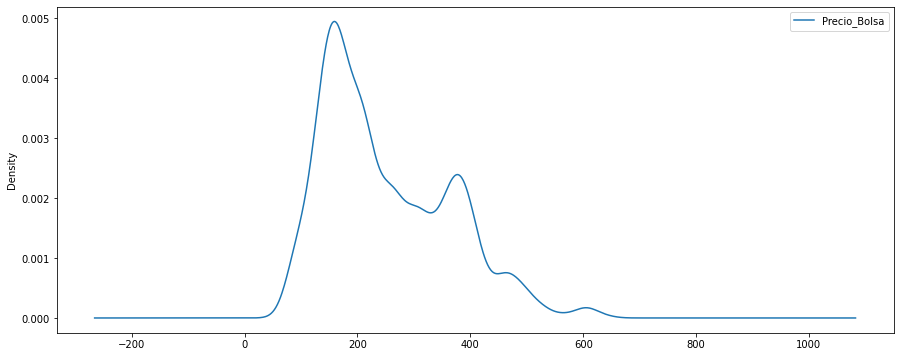

In [ ]:
time_series_1.set_index('Fecha').plot(kind='kde', figsize=(15, 6))

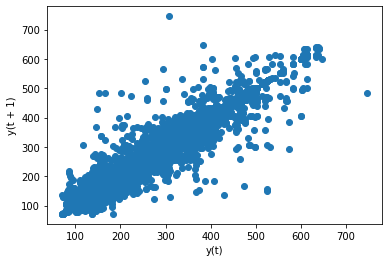

In [ ]:
from pandas.plotting import lag_plot
lag_plot(time_series_1.set_index('Fecha'))

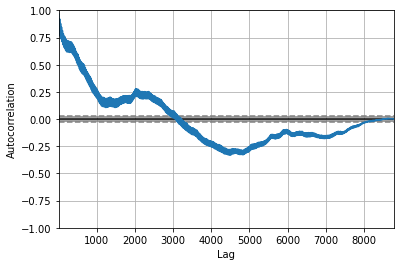

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(time_series_1.set_index('Fecha'))

In [ ]:
time_series_1.set_index('Fecha').diff()

,Precio_Bolsa
Fecha,
2020-12-31 23:00:00,NaN
2020-12-31 22:00:00,15.00
2020-12-31 21:00:00,0.00
2020-12-31 20:00:00,25.00
2020-12-31 19:00:00,0.00
...,...
2020-01-01 04:00:00,55.69
2020-01-01 03:00:00,0.00
2020-01-01 02:00:00,0.00


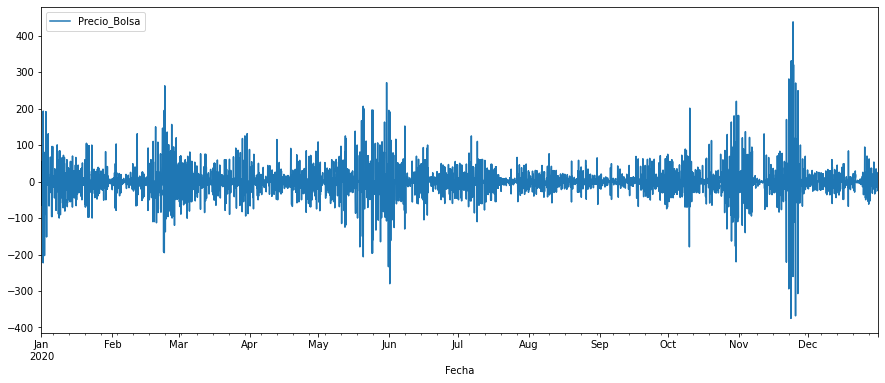

In [ ]:
time_series_1.set_index('Fecha').diff().plot(figsize=(15, 6))

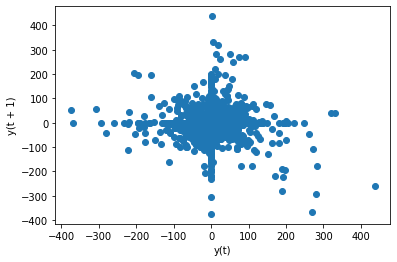

In [ ]:
lag_plot(time_series_1.set_index('Fecha').diff())

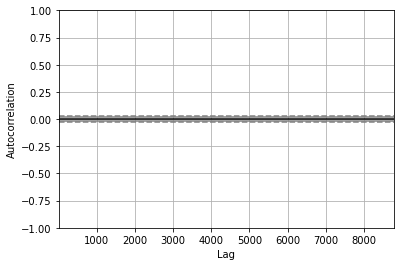

In [ ]:
autocorrelation_plot(time_series_1.set_index('Fecha').diff())

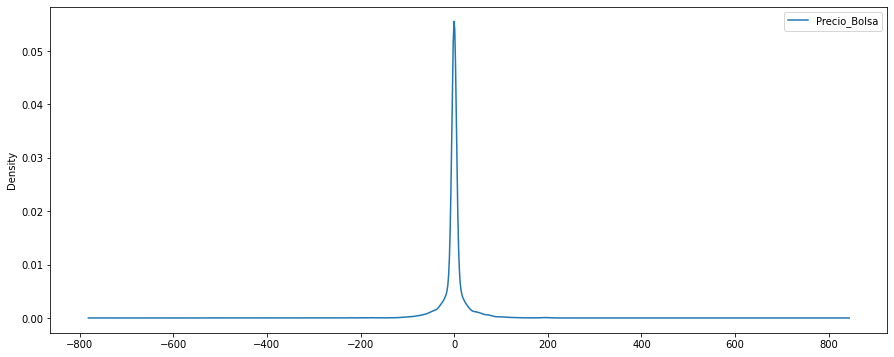

In [ ]:
time_series_1.set_index('Fecha').diff().plot(kind='kde', figsize=(15, 6))

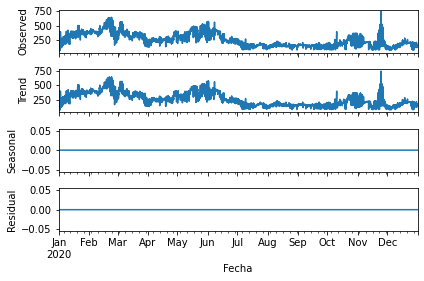

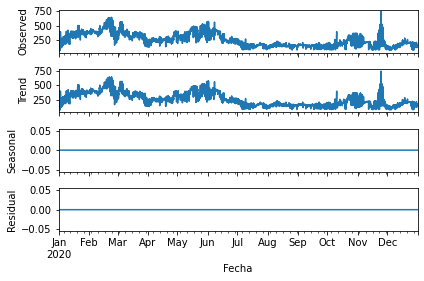

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(time_series_1.set_index('Fecha'), model='additive', freq=1)
result.plot()

In [ ]:
ADF Statistic: 
p-value: 

In [ ]:
from statsmodels.tsa.stattools import adfuller
X = time_series_1.set_index('Fecha').diff().dropna().Precio_Bolsa
result = adfuller(X)
result

(-17.609911521243657,
 3.884176483645095e-30,
 36,
 8746,
 {'1%': -3.43109790993778,
  '10%': -2.566945934275714,
  '5%': -2.861870526484161},
 81238.20940912943)

In [ ]:
from statsmodels.tsa.stattools import adfuller
X = time_series_1.set_index('Fecha').Precio_Bolsa
result = adfuller(X)
result

(-2.7703096171718458,
 0.06264157849933619,
 37,
 8746,
 {'1%': -3.43109790993778,
  '10%': -2.566945934275714,
  '5%': -2.861870526484161},
 81240.8355061678)

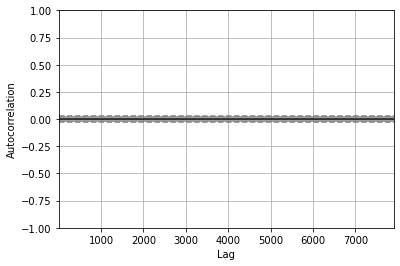

In [ ]:
from pandas import concat
from pandas import DataFrame
values = DataFrame(time_series_1.set_index('Fecha').Precio_Bolsa)
dataframe = concat([values.shift(-1), values], axis=1)
X = dataframe.values
dataframe.columns = ['t', 't+1']
train_size = int(len(X) * 0.1)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
autocorrelation_plot(residuals)
pyplot.show()

In [ ]:
dataframe

,t,t+1
Fecha,,
2020-12-31 23:00:00,153.28,138.28
2020-12-31 22:00:00,153.28,153.28
2020-12-31 21:00:00,178.28,153.28
2020-12-31 20:00:00,178.28,178.28
2020-12-31 19:00:00,178.28,178.28
...,...,...
2020-01-01 04:00:00,127.71,127.71
2020-01-01 03:00:00,127.71,127.71
2020-01-01 02:00:00,136.71,127.71


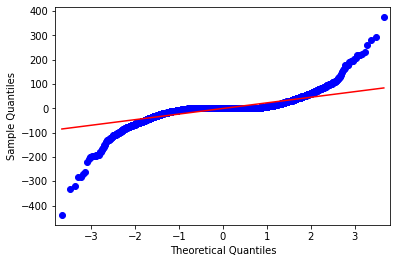

In [ ]:
import numpy
from statsmodels.graphics.gofplots import qqplot
values1 = DataFrame(time_series_1.set_index('Fecha').Precio_Bolsa.values)
dataframe1 = concat([values.shift(-1), values], axis=1)
dataframe1.columns = ['t', 't+1']
# split into train and test sets
X1 = dataframe1.values
train_size1 = int(len(X1) * 0.66)
train1, test1 = X1[1:train_size1], X1[train_size1:]
train_X1, train_y1 = train1[:,0], train1[:,1]
test_X1, test_y1 = test1[:,0], test1[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = numpy.array(residuals)[:-2]
qqplot(residuals, line='r')
pyplot.show()

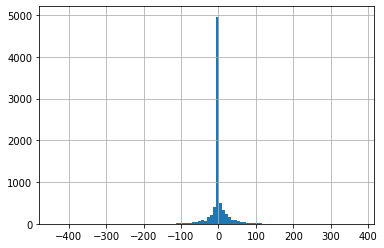

In [ ]:
pd.Series(residuals).hist(bins = 100)

In [ ]:
dataframe1

,t,t+1
Fecha,,
2020-12-31 23:00:00,153.28,138.28
2020-12-31 22:00:00,153.28,153.28
2020-12-31 21:00:00,178.28,153.28
2020-12-31 20:00:00,178.28,178.28
2020-12-31 19:00:00,178.28,178.28
...,...,...
2020-01-01 04:00:00,127.71,127.71
2020-01-01 03:00:00,127.71,127.71
2020-01-01 02:00:00,136.71,127.71


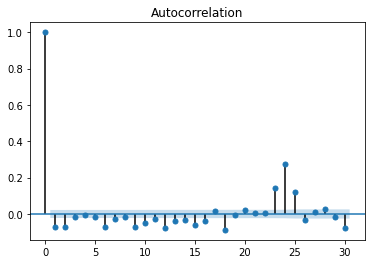

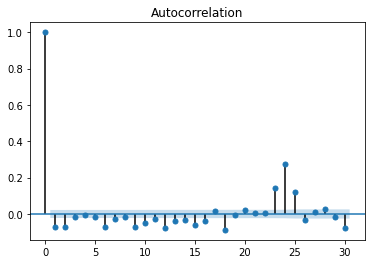

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, lags=30)

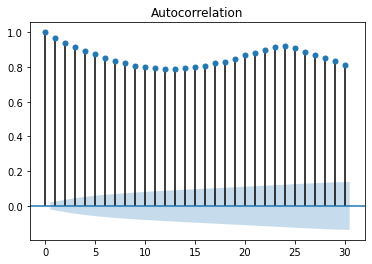

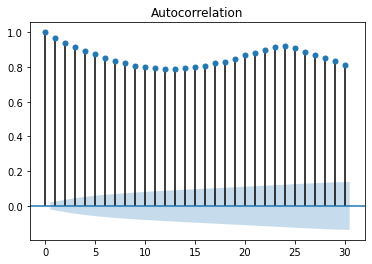

In [ ]:
plot_acf(time_series_1.set_index('Fecha').Precio_Bolsa, lags=30)

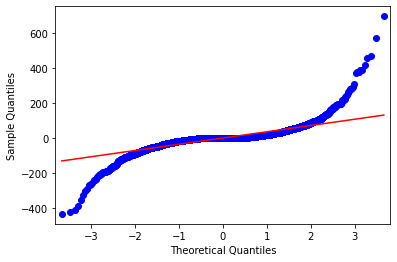

In [ ]:
values2= DataFrame(time_series_1.set_index('Fecha').diff())
dataframe2 = concat([values2.shift(-1), values2], axis=1).dropna()
dataframe2.columns = ['t', 't+1']
# split into train and test sets
X2 = dataframe2.values
train_size2 = int(len(X1) * 0.1)
train2, test2 = X2[1:train_size2], X2[train_size2:]
train_X2, train_y2 = train2[:,0], train2[:,1]
test_X2, test_y2 = test2[:,0], test2[:,1]
# persistence model
predictions2 = [x for x in test_X2]
# calculate residuals
residuals2 = [test_y2[i]-predictions2[i] for i in range(len(predictions2))]
residuals2 = numpy.array(residuals2)[:-2]
qqplot(residuals2, line='r')
pyplot.show()

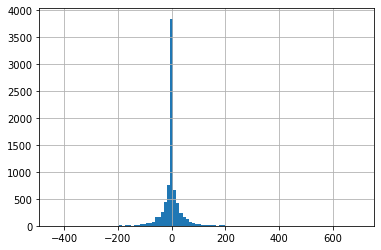

In [ ]:
pd.Series(residuals2).hist(bins = 100)

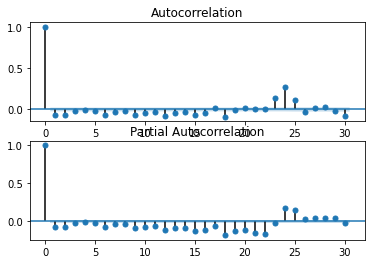

In [ ]:
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, lags=30, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, lags=30, ax=pyplot.gca())
pyplot.show()

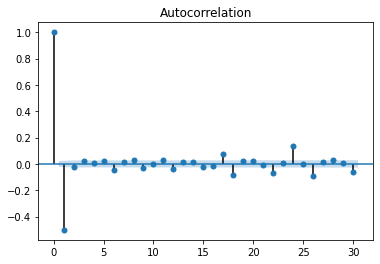

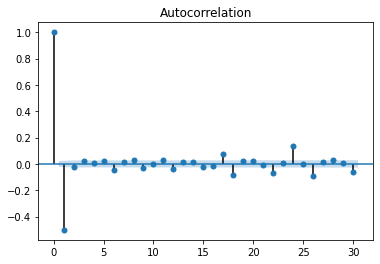

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals2, lags=30)

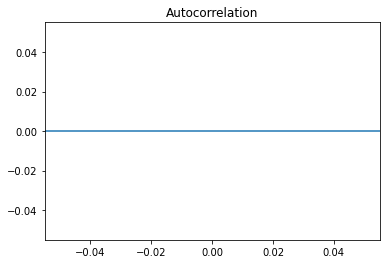

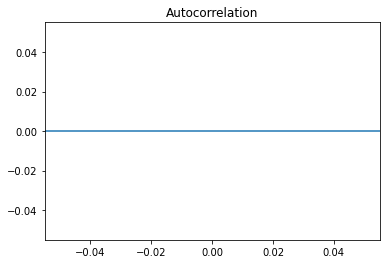

In [ ]:
plot_acf(time_series_1.set_index('Fecha').Precio_Bolsa.diff(), lags=30)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1H will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:           Precio_Bolsa   No. Observations:                 8784
Model:                     ARMA(1, 0)   Log Likelihood              -42032.589
Method:                       css-mle   S.D. of innovations             28.964
Date:                Fri, 02 Jul 2021   AIC                          84071.178
Time:                        04:18:07   BIC                          84092.420
Sample:                    12-31-2020   HQIC                         84078.415
                         - 01-01-2020                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                250.1485      9.315     26.856      0.000     231.892     268.405
ar.L1.Precio_Bolsa     0.9669      0.003    355.439      0.000       0.962       0.972
                    

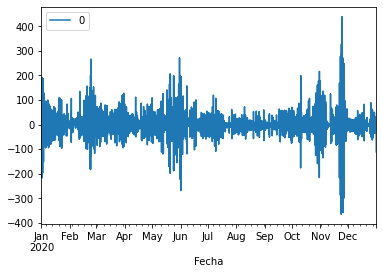

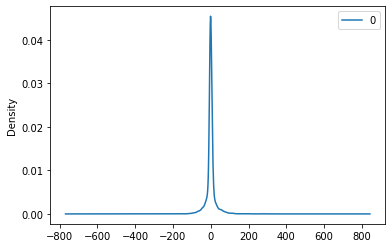

                 0
count  8784.000000
mean      0.011881
std      28.988142
min    -365.920638
25%      -4.043248
50%      -1.166129
75%       4.558731
max     439.529099


In [ ]:
# fit model
model = ARIMA(time_series_1.set_index('Fecha'), order=(1,0,0))
model_fit = model.fit(disp=0)
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1H will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:           Precio_Bolsa   No. Observations:                 8784
Model:                     ARMA(1, 1)   Log Likelihood              -42012.882
Method:                       css-mle   S.D. of innovations             28.899
Date:                Fri, 02 Jul 2021   AIC                          84033.764
Time:                        04:19:19   BIC                          84062.087
Sample:                    12-31-2020   HQIC                         84043.414
                         - 01-01-2020                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                250.0295     10.069     24.832      0.000     230.295     269.764
ar.L1.Precio_Bolsa     0.9718      0.003    371.518      0.000       0.967       0.977
ma.L1.Precio_Bolsa  

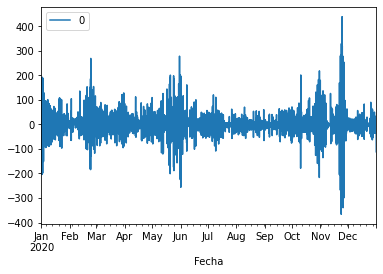

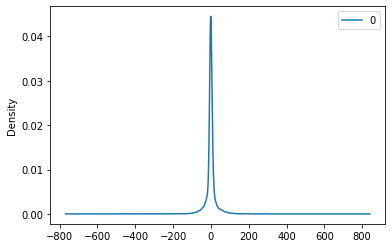

                 0
count  8784.000000
mean      0.012976
std      28.923227
min    -366.261390
25%      -4.240995
50%      -1.071707
75%       4.593209
max     438.359148


In [ ]:
# fit model
model = ARIMA(time_series_1.set_index('Fecha'), order=(1,0,1))
model_fit = model.fit(disp=0)
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
time_series_1.set_index('Fecha').mean()

Precio_Bolsa    251.100759
dtype: float64

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

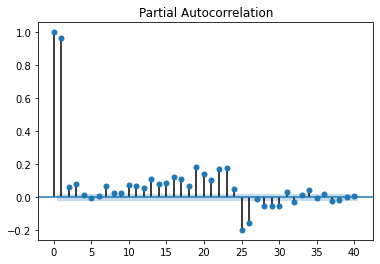

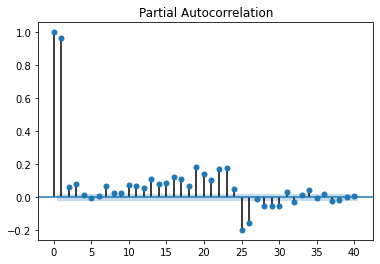

In [ ]:
plot_pacf(time_series_1.set_index('Fecha'))

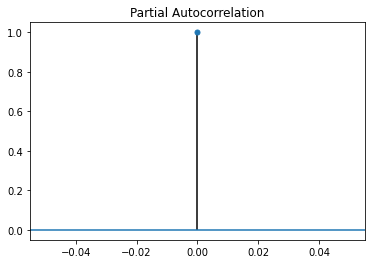

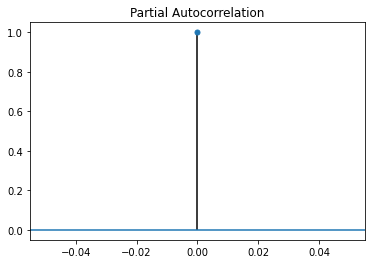

In [ ]:
plot_pacf(time_series_1.set_index('Fecha').diff())